In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from ggplot import *

In [3]:
!head ../data/CE_exp.umi.tab

In [4]:
ce = pd.read_csv('../data/CE_exp.umi.tab', sep='\t', skipfooter=5)
ce

/home/ilya/.venv/pydata3/lib/python3.5/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,#Sample:,CE_1.genome,CE_10.genome,CE_2.genome,CE_3.genome,CE_4.genome,CE_5.genome,CE_6.genome,CE_7.genome,CE_8.genome,CE_9.genome
0,2L52.1,0,0,1,0,0,0,1,0,0,1
1,2L52.2,0,0,0,0,0,0,0,0,0,0
2,2RSSE.1,0,0,0,0,0,0,0,0,0,0
3,2RSSE.2,0,0,0,0,0,0,0,0,0,0
4,2RSSE.3,0,0,0,0,0,0,0,0,0,0
5,2RSSE.4,0,0,0,0,0,0,0,0,0,0
6,2RSSE.5,0,0,0,0,0,0,0,0,0,0
7,2RSSE.6,0,0,0,0,0,0,0,0,0,0
8,2RSSE.7,0,0,0,0,0,0,0,0,0,0
9,2RSSE.8,0,0,0,0,0,0,0,0,0,0


In [6]:
X_std = StandardScaler().fit_transform(ce.ix[:,1:].values.T)
X_std

/home/ilya/.venv/pydata3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ilya/.venv/pydata3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.65465367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.65465367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.52752523,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.65465367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.65465367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.52752523,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
sklearn_pca = sklearnPCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X_std)
Y_sklearn

array([[-107.54637613,    4.6386434 ,   -8.96436965,    1.74959571,
          -5.84279506],
       [  77.76417444,  -82.99017343,  -20.31203618,   66.64812686,
           5.10038587],
       [ -33.61791504,    9.16017706,   16.36542596,   20.31234869,
           4.2996665 ],
       [  37.6400268 ,  -12.49524475,  -29.94564789,  -58.27515056,
          78.17629776],
       [ -84.37129696,    7.85590075,    2.77664314,    8.37739348,
          -0.39291999],
       [ -84.32108904,   18.52710864,   17.76689491,   17.39067789,
          -0.25572886],
       [  74.22764494,  -24.29898047,   94.79125403,  -36.39979914,
         -14.23179938],
       [ -81.28146377,    3.42275602,  -11.99135369,   -4.74455895,
          -2.38797453],
       [  54.27562717,   -8.83970945,  -52.92762837,  -49.35929231,
         -69.66608769],
       [ 147.23066758,   85.01952222,   -7.55918226,   34.30065833,
           5.20095538]])

In [8]:
sklearn_pca.explained_variance_

array([ 7112.81202876,  1546.25101478,  1396.85295185,  1358.65660964,
        1127.90528826])

In [9]:
sklearn_pca.explained_variance_ratio_

array([ 0.45638832,  0.09921405,  0.08962804,  0.0871772 ,  0.07237121])

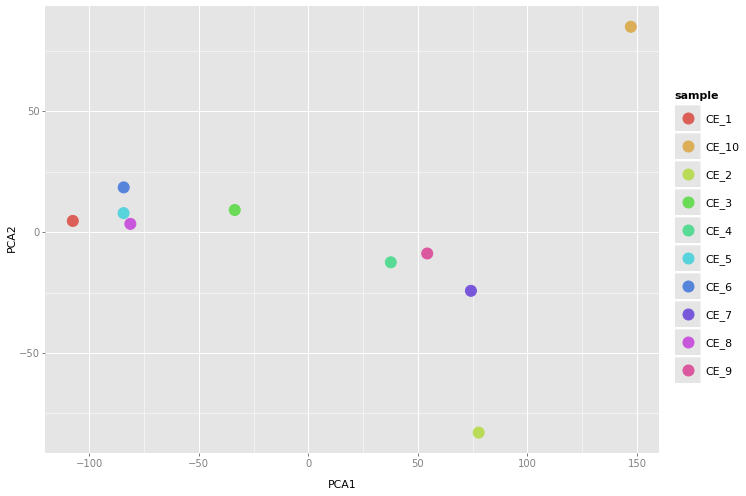

<ggplot: (8736206711535)>


In [10]:
pca_df = pd.DataFrame()
pca_df['sample'] = ['CE_%i' % (x+1) for x in range(10)]
pca_df['PCA1'] = 0
pca_df['PCA2'] = 0

for i in range(Y_sklearn.shape[0]):
    pca_df.ix[i, 'PCA1'] = Y_sklearn[i,0]
    pca_df.ix[i, 'PCA2'] = Y_sklearn[i,1]

g = ggplot(pca_df, aes(x='PCA1', y='PCA2', color='sample')) \
    + geom_point(size=10)
print(g)

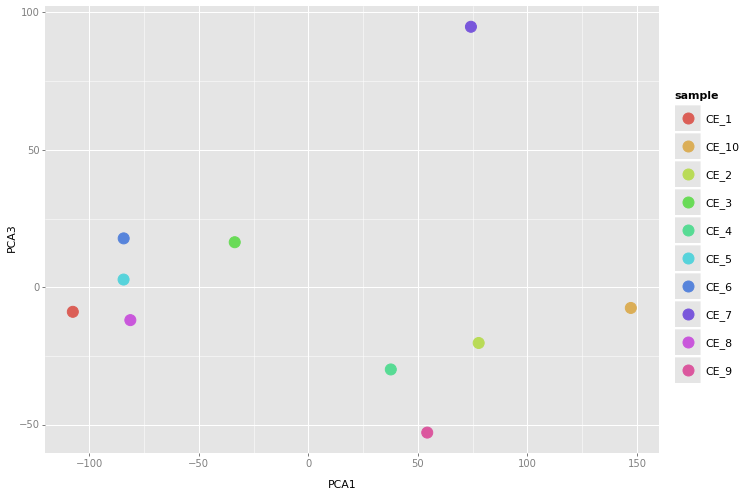

<ggplot: (8736206729883)>


In [11]:
pca_df = pd.DataFrame()
pca_df['sample'] = ['CE_%i' % (x+1) for x in range(10)]
pca_df['PCA2'] = 0
pca_df['PCA3'] = 0

for i in range(Y_sklearn.shape[0]):
    pca_df.ix[i, 'PCA1'] = Y_sklearn[i,0]
    pca_df.ix[i, 'PCA3'] = Y_sklearn[i,2]

g = ggplot(pca_df, aes(x='PCA1', y='PCA3', color='sample')) \
    + geom_point(size=10)
print(g)

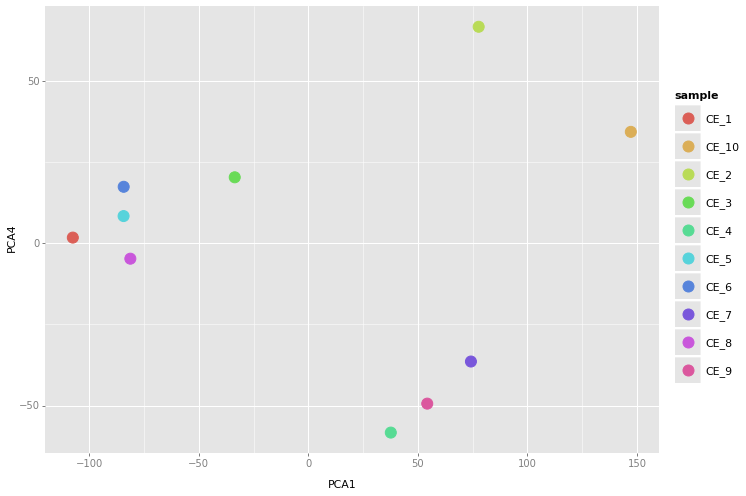

<ggplot: (8736206711023)>


In [12]:
pca_df = pd.DataFrame()
pca_df['sample'] = ['CE_%i' % (x+1) for x in range(10)]
pca_df['PCA2'] = 0
pca_df['PCA4'] = 0

for i in range(Y_sklearn.shape[0]):
    pca_df.ix[i, 'PCA1'] = Y_sklearn[i,0]
    pca_df.ix[i, 'PCA4'] = Y_sklearn[i,3]

g = ggplot(pca_df, aes(x='PCA1', y='PCA4', color='sample')) \
    + geom_point(size=10)
print(g)

In [54]:
ce.ix[ce.ix[:,1:].mean(axis=1)>500,:]

,#Sample:,CE_1.genome,CE_10.genome,CE_2.genome,CE_3.genome,CE_4.genome,CE_5.genome,CE_6.genome,CE_7.genome,CE_8.genome,CE_9.genome
229,B0041.4,2305,3242,2916,3387,2640,2576,3314,2574,2979,3566
259,B0205.3,374,723,539,727,451,418,694,373,688,900
263,B0205.7,308,691,462,711,370,385,624,314,622,912
376,B0244.8,1317,2220,1928,2027,1444,1433,2204,1534,2042,2406
381,B0250.1,1189,2195,1807,2254,1500,1508,2262,1478,1981,2402
390,B0250.3,875,1718,1333,1661,1087,1057,1653,1100,1580,1900
410,B0261.7,459,787,652,735,509,504,829,424,758,1070
546,B0280.5,2524,3335,3287,3475,2646,2618,3446,2549,3217,3615
650,B0336.10,1206,2159,1582,2226,1484,1279,2122,1417,1940,2379
677,B0348.6,634,1311,912,1442,854,788,1388,816,1248,1643
